In [1]:
import pandas as pd
data = pd.read_csv("Creditcard_data.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


[Text(0, 0, '763'), Text(0, 0, '9')]

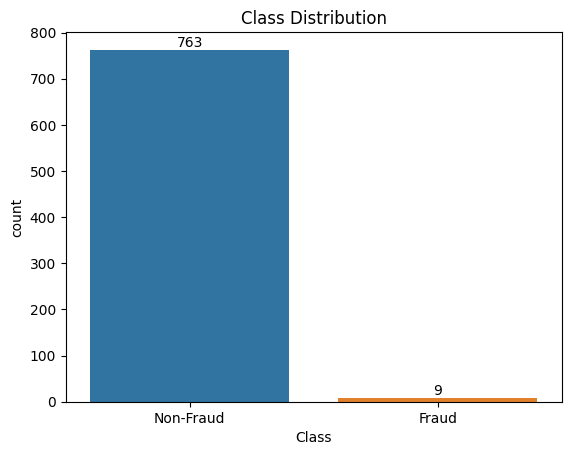

In [2]:
# Plot class distribution show the number of fraud and non-fraud transactions
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x='Class', data=data)
ax.set_title('Class Distribution')
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
ax.bar_label(ax.containers[0])

##### Using class imbalance techniques

* Resampling the data

In [3]:
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]
print('Non-Fraud Transactions: ', class_0.shape[0])
print('Fraud Transactions: ', class_1.shape[0])

Non-Fraud Transactions:  763
Fraud Transactions:  9


In [4]:
# Undersample the data
# Randomly select the same number of non-fraud transactions as fraud transactions
class_0_under = class_0.sample(class_1.shape[0])
data_under = pd.concat([class_0_under, class_1], axis=0)
print('Non-Fraud Transactions: ', data_under[data_under['Class'] == 0].shape[0])
print('Fraud Transactions: ', data_under[data_under['Class'] == 1].shape[0])

Non-Fraud Transactions:  9
Fraud Transactions:  9


In [5]:
data_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
352,259,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,-0.401866,...,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037,0.99,0
127,80,-0.655264,0.409899,1.289156,-0.325043,0.545669,-0.349811,0.648240,0.036063,0.078701,...,-0.155727,-0.477390,-0.126525,-0.443628,-0.012118,0.143173,0.049783,0.118280,32.51,0
409,297,1.168460,0.284169,0.427985,1.382027,-0.057586,-0.157170,0.132989,-0.070709,0.141838,...,-0.091412,0.025132,-0.072434,0.121771,0.697131,-0.315949,0.046610,0.017891,6.86,0
42,33,-0.607877,1.031345,1.740450,1.232106,0.418592,0.119168,0.850893,-0.176267,-0.243501,...,-0.087329,0.258315,-0.264775,0.118282,0.173508,-0.217041,0.094312,-0.033041,14.80,0
478,353,0.150999,-3.002120,0.824301,0.231721,-2.621415,0.128843,-0.755233,0.095956,0.638219,...,0.521719,0.320297,-0.591253,0.447557,0.164080,-0.131897,-0.047547,0.130266,611.76,0


[Text(0, 0, '9'), Text(0, 0, '9')]

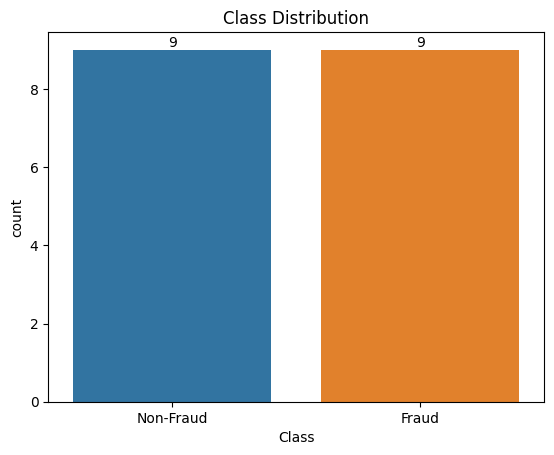

In [6]:
ax = sns.countplot(x = data_under['Class'])
ax.set_title('Class Distribution')
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
ax.bar_label(ax.containers[0])

In [7]:
# Oversampling
class_1_over = class_1.sample(class_0.shape[0], replace= True)
data_over = pd.concat([class_0, class_1_over], axis= 0)
data_over.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


[Text(0, 0, '763'), Text(0, 0, '763')]

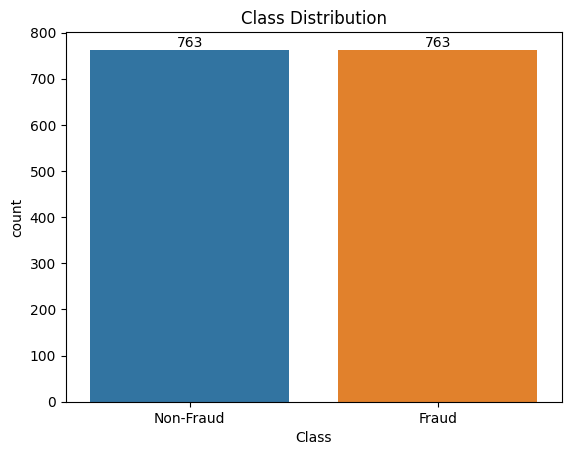

In [8]:
ax = sns.countplot(x = data_over['Class'])
ax.set_title('Class Distribution')
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
ax.bar_label(ax.containers[0])

## Using Imblearn

#### Random Under Sampling and Over Sampling

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus = RandomUnderSampler(random_state = 42, replacement = True)
x_rus, y_rus = rus.fit_resample(data.drop('Class', axis = 1),data['Class'])
ros = RandomOverSampler(random_state = 42)
x_ros, y_ros = ros.fit_resample(data.drop('Class', axis = 1),data['Class'])

In [10]:
x_rus.shape, y_rus.shape, x_ros.shape, y_ros.shape

((18, 30), (18,), (1526, 30), (1526,))

#### Tomek links

In [11]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
x_tl, y_tl = tl.fit_resample(data.drop('Class', axis = 1),data['Class'])
x_tl.shape, y_tl.shape

((765, 30), (765,))

#### SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(data.drop('Class', axis = 1),data['Class'])
x_smote.shape, y_smote.shape

((1526, 30), (1526,))

#### NearMiss

In [13]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(data.drop('Class', axis = 1),data['Class'])
x_nm.shape, y_nm.shape

((18, 30), (18,))

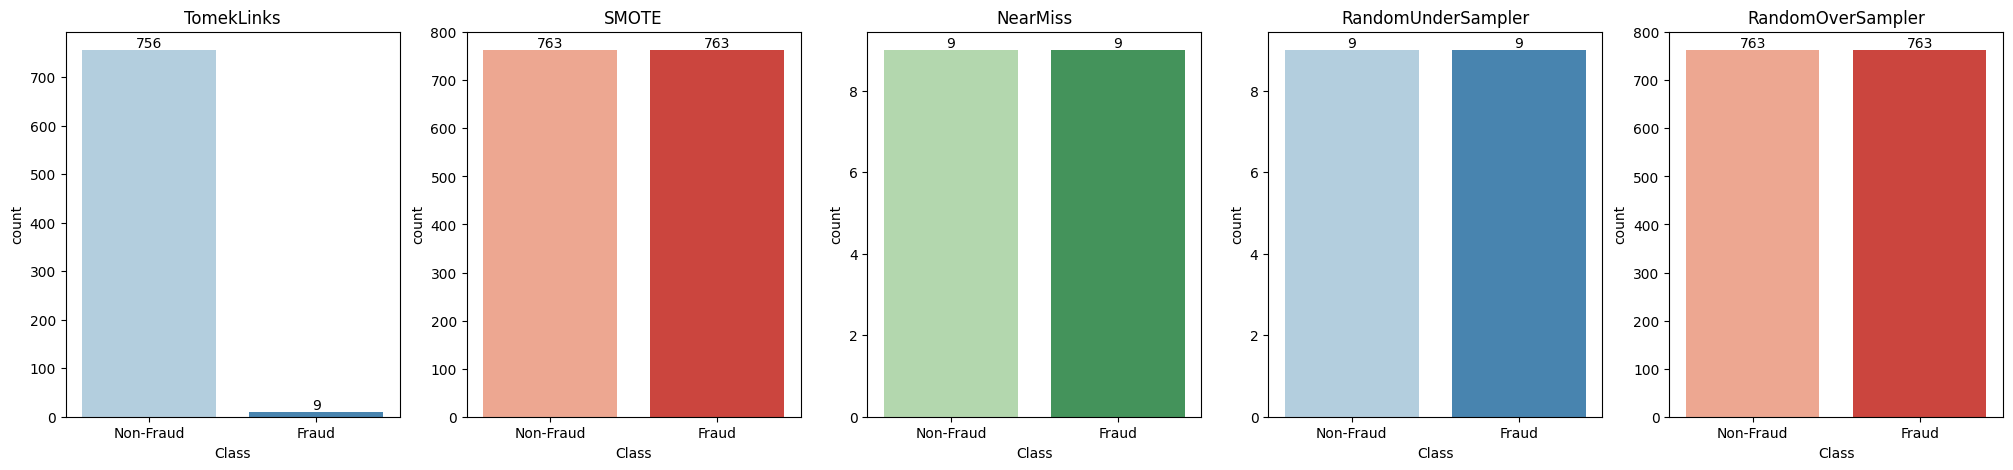

In [14]:
# Plot the class distribution of the undersampled data using TomekLinks, SMOTE, and NearMiss, RandomUnderSampler, and RandomOverSampler

fig, axis = plt.subplots(1, 5, figsize = (25, 5))
sns.countplot(x = y_tl, ax = axis[0], palette = 'Blues')
sns.countplot(x = y_smote, ax = axis[1], palette = 'Reds')
sns.countplot(x = y_nm, ax = axis[2], palette = 'Greens')
sns.countplot(x = y_rus, ax = axis[3], palette = 'Blues')
sns.countplot(x = y_ros, ax = axis[4], palette = 'Reds')
axis[0].set_title('TomekLinks')
axis[1].set_title('SMOTE')
axis[2].set_title('NearMiss')
axis[3].set_title('RandomUnderSampler')
axis[4].set_title('RandomOverSampler')
axis[0].bar_label(axis[0].containers[0])
axis[1].bar_label(axis[1].containers[0])
axis[2].bar_label(axis[2].containers[0])
axis[3].bar_label(axis[3].containers[0])
axis[4].bar_label(axis[4].containers[0])
axis[0].set_xticklabels(['Non-Fraud', 'Fraud'])
axis[1].set_xticklabels(['Non-Fraud', 'Fraud'])
axis[2].set_xticklabels(['Non-Fraud', 'Fraud'])
axis[3].set_xticklabels(['Non-Fraud', 'Fraud'])
axis[4].set_xticklabels(['Non-Fraud', 'Fraud'])
plt.show()

### Training 

In [15]:
# Use 5 different classifiers to train the data
# Use the undersampled data using TomekLinks, SMOTE, and NearMiss, RandomUnderSampler, and RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
]

# Define a function to train the data and print the accuracy, confusion matrix, and classification report
def train_model(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Avoid warning of convergence
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_test, y_pred


In [16]:
sampled_data_names = ['TomekLinks', 'SMOTE', 'NearMiss', 'RandomUnderSampler', 'RandomOverSampler']
sampled_data = [x_tl, x_smote, x_nm, x_rus, x_ros]
sampled_data_labels = [y_tl, y_smote, y_nm, y_rus, y_ros]
model_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']

predictions = pd.DataFrame()
predictions['Model'] = model_names


for i in range(len(sampled_data)):
    for j in range(len(classifiers)):
        y_test, y_pred = train_model(sampled_data[i], sampled_data_labels[i], classifiers[j])
        predictions.loc[j, sampled_data_names[i]] = accuracy_score(y_test, y_pred)

In [17]:
predictions

,Model,TomekLinks,SMOTE,NearMiss,RandomUnderSampler,RandomOverSampler
0,KNN,0.986928,0.862745,0.75,0.75,0.990196
1,SVM,0.986928,0.627451,0.00,0.00,1.000000
2,Decision Tree,0.980392,0.970588,0.00,0.50,0.977124
3,Random Forest,0.986928,0.957516,0.00,0.25,0.980392
4,Naive Bayes,0.954248,0.839869,0.75,0.00,0.758170


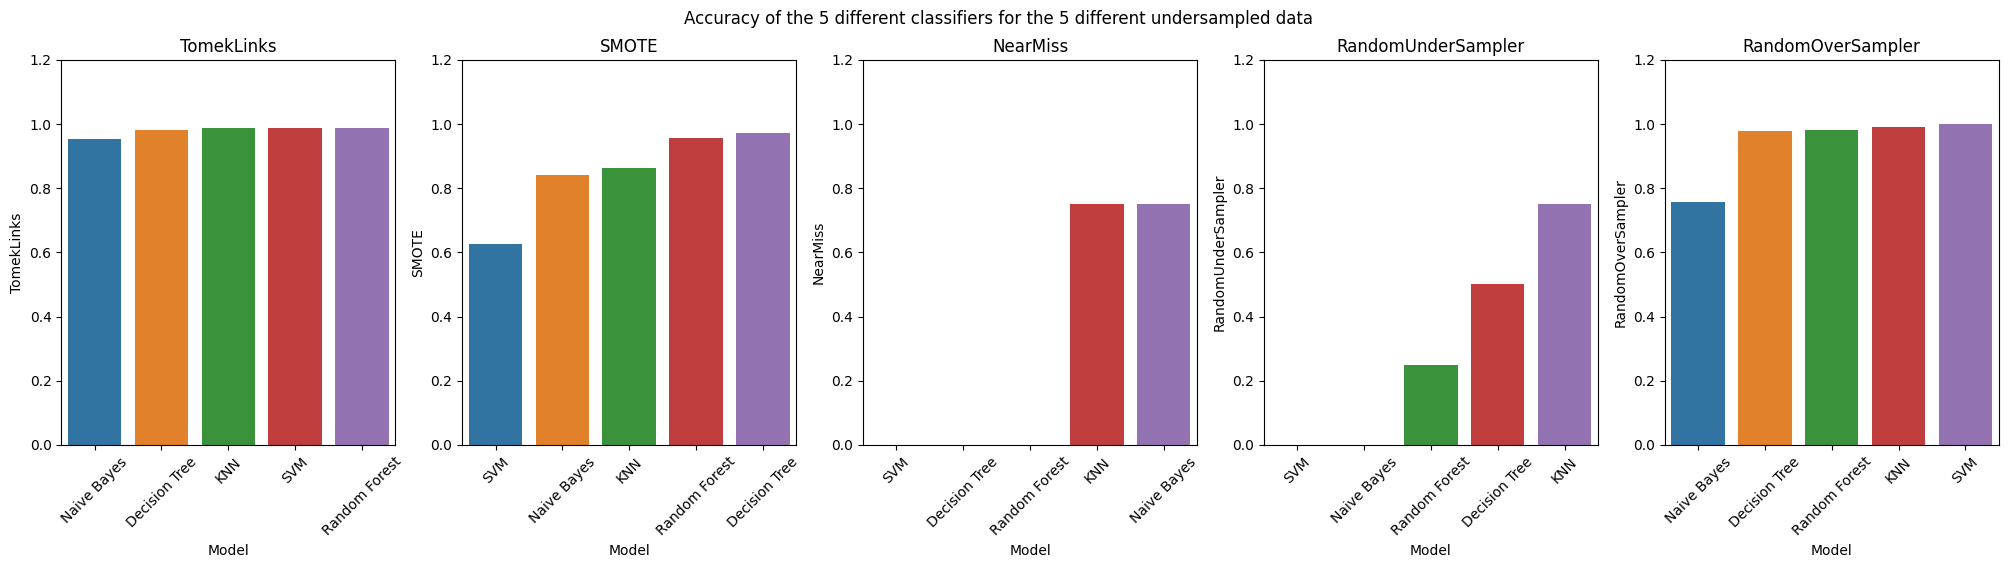

In [42]:
# Plot the accuracy of the 5 different classifiers for the 5 different undersampled data
fig, axis = plt.subplots(1, 5, figsize = (25, 5))
fig.suptitle('Accuracy of the 5 different classifiers for the 5 different undersampled data')
for i in range(len(sampled_data)):
    axis[i].set_ylim(0, 1.2)
    sns.barplot(x = predictions['Model'], y = predictions[sampled_data_names[i]], ax = axis[i], order = predictions.sort_values(by = sampled_data_names[i])['Model'])
    axis[i].set_title(sampled_data_names[i])
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation = 45)

plt.show()

In [69]:
# Get the best model from predictions using average accuracy
best_model = predictions.mean(axis = 1, numeric_only= True).idxmax()
predictions.loc[best_model]

Model                      KNN
TomekLinks            0.986928
SMOTE                 0.862745
NearMiss                  0.75
RandomUnderSampler        0.75
RandomOverSampler     0.990196
Name: 0, dtype: object